# Herramientas de visualización

## Gráfico de barras
En un gráfico de barras, la longitud de la barra codifica el valor. Hay dos variantes de gráficos de barras:gráficos de barras verticales y gráficos de barras horizontales.

**USO**

* Si bien ambos se usan para comparar valores numéricos entre categorías, la barra vertical los gráficos se utilizan a veces para mostrar una sola variable a lo largo del tiempo. 

**NO USAR**

* No confunda los gráficos de barras verticales con los histogramas. Los gráficos de barras comparan diferentes variables o categorías, mientras que los histogramas muestran la distribución de una sola variable. Los histogramas se discutirán más adelante.
* Otro error común es usar gráficos de barras para mostrar las tendencias centrales entre grupos o categorías. Se usan diagramas de caja o diagramas de violín para mostrar medidas estadísticas o distribuciones en estos casos.

**EJEMPLO 1**

En esta actividad, usaremos un gráfico de barras para comparar las valoraciones de las películas. Te dan cinco películas con valoraciones de Rotten Tomatoes. El Tomatómetro es el porcentaje de aprobación por parte de los críticos del Tomatómetro que han dado una crítica positiva a la película. La Puntuación de la audiencia es el porcentaje de usuarios que han dado una puntuación de 3,5 o más sobre 5. Compara estas dos puntuaciones entre las cinco películas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
movie_scores = pd.read_csv('datasets/movie_scores.csv', index_col=0)
movie_scores.head()

,MovieTitle,Tomatometer,AudienceScore
0,The Shape of Water,91,73
1,Black Panther,97,79
2,Dunkirk,92,81
3,The Martian,91,91
4,The Hobbit: An Unexpected Journey,64,83


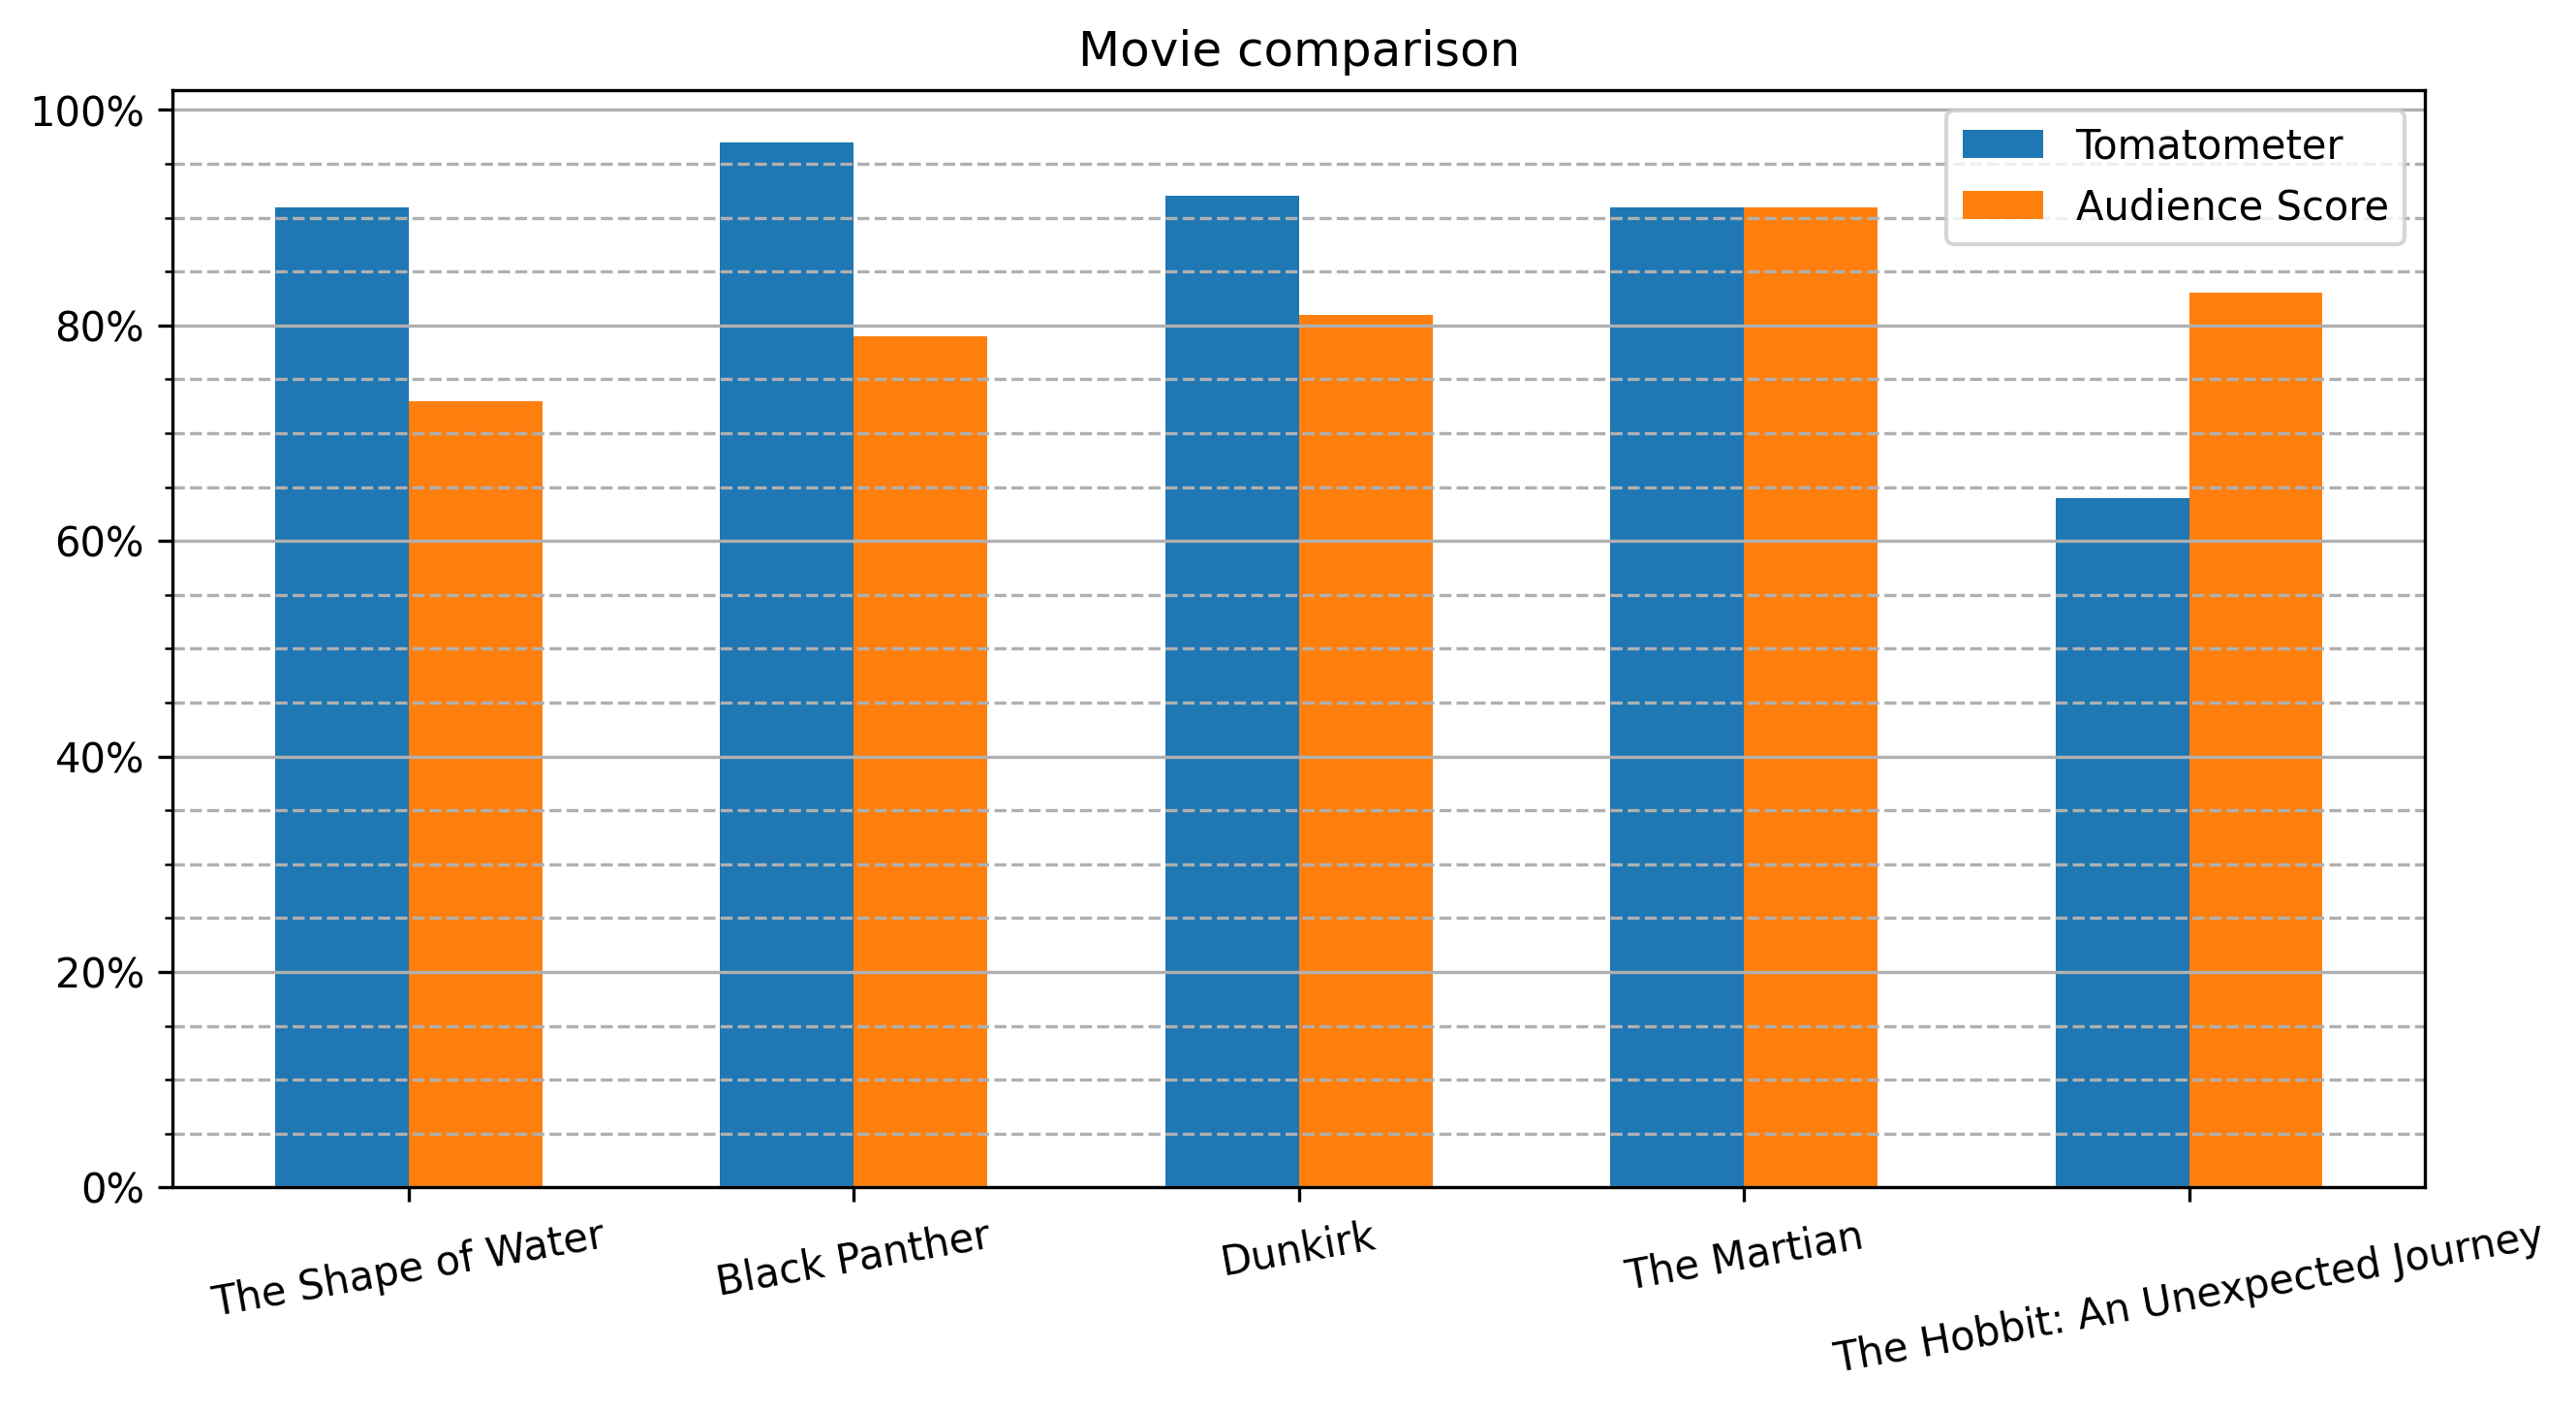

In [3]:
# Create figure
plt.figure(figsize=(10, 5), dpi=300)
# Create bar plot
pos = np.arange(len(movie_scores['MovieTitle']))
width = 0.3
plt.bar(pos - width / 2, movie_scores['Tomatometer'], width, label='Tomatometer')
plt.bar(pos + width / 2, movie_scores['AudienceScore'], width, label='Audience Score')
# Specify ticks
plt.xticks(pos, rotation=10)
plt.yticks(np.arange(0, 101, 20))
# Get current Axes for setting tick labels and horizontal grid
ax = plt.gca()
# Set tick labels
ax.set_xticklabels(movie_scores['MovieTitle'])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
# Add minor ticks for y-axis in the interval of 5
ax.set_yticks(np.arange(0, 100, 5), minor=True)
# Add major horizontal grid with solid lines
ax.yaxis.grid(which='major')
# Add minor horizontal grid with dashed lines
ax.yaxis.grid(which='minor', linestyle='--')
# Add title
plt.title('Movie comparison')
# Add legend
plt.legend()
# Show plot
plt.show()

In [ ]:
movie_scores2 = pd.DataFrame({"Movie Title": list(movie_scores["MovieTitle"]) * 2,
                "Score": list(movie_scores["AudienceScore"]) + list(movie_scores["Tomatometer"]),
                "Type": ["Audience Score"] * len(movie_scores["AudienceScore"]) + ["Tomatometer"] * len(movie_scores["Tomatometer"])})
movie_scores2.head()

,Movie Title,Score,Type
0,The Shape of Water,73,Audience Score
1,Black Panther,79,Audience Score
2,Dunkirk,81,Audience Score
3,The Martian,91,Audience Score
4,The Hobbit: An Unexpected Journey,83,Audience Score


**EJEMPLO 2**
Usaremos un gráfico de barras apiladas para visualizar el desempeño de un restaurante. Veamos el siguiente escenario: 
* Eres el dueño de un restaurante y debido a una nueva ley tienes que introducir un día sin fumar. Para tener la menor cantidad de pérdidas posible, desea visualizar cuántas ventas se realizan todos los días según las personas fumadoras y no fumadoras.

In [30]:
bills = sns.load_dataset('tips')
bills.head()

Utilice el conjunto de datos proporcionado y cree una matriz donde los elementos contengan la suma de las facturas totales de cada día y se dividan por persona fumadora/no fumadora.

In [31]:
days = ['Thur', 'Fri', 'Sat', 'Sun']
days_range = np.arange(len(days))
smoker = ['Yes', 'No']

bills_by_days = [bills[bills['day'] == day] for day in days]
bills_by_days_smoker = [[bills_by_days[day][bills_by_days[day]['smoker'] == s] for s in smoker] for day in days_range]
total_by_days_smoker = [[bills_by_days_smoker[day][s]['total_bill'].sum() for s in range(len(smoker))] for day in days_range]
totals = np.asarray(total_by_days_smoker)

Cree un gráfico de barras apiladas, apilando las facturas totales sumadas de fumadores y no fumadores separadas para cada día. Agregue una leyenda, etiquetas y un título.

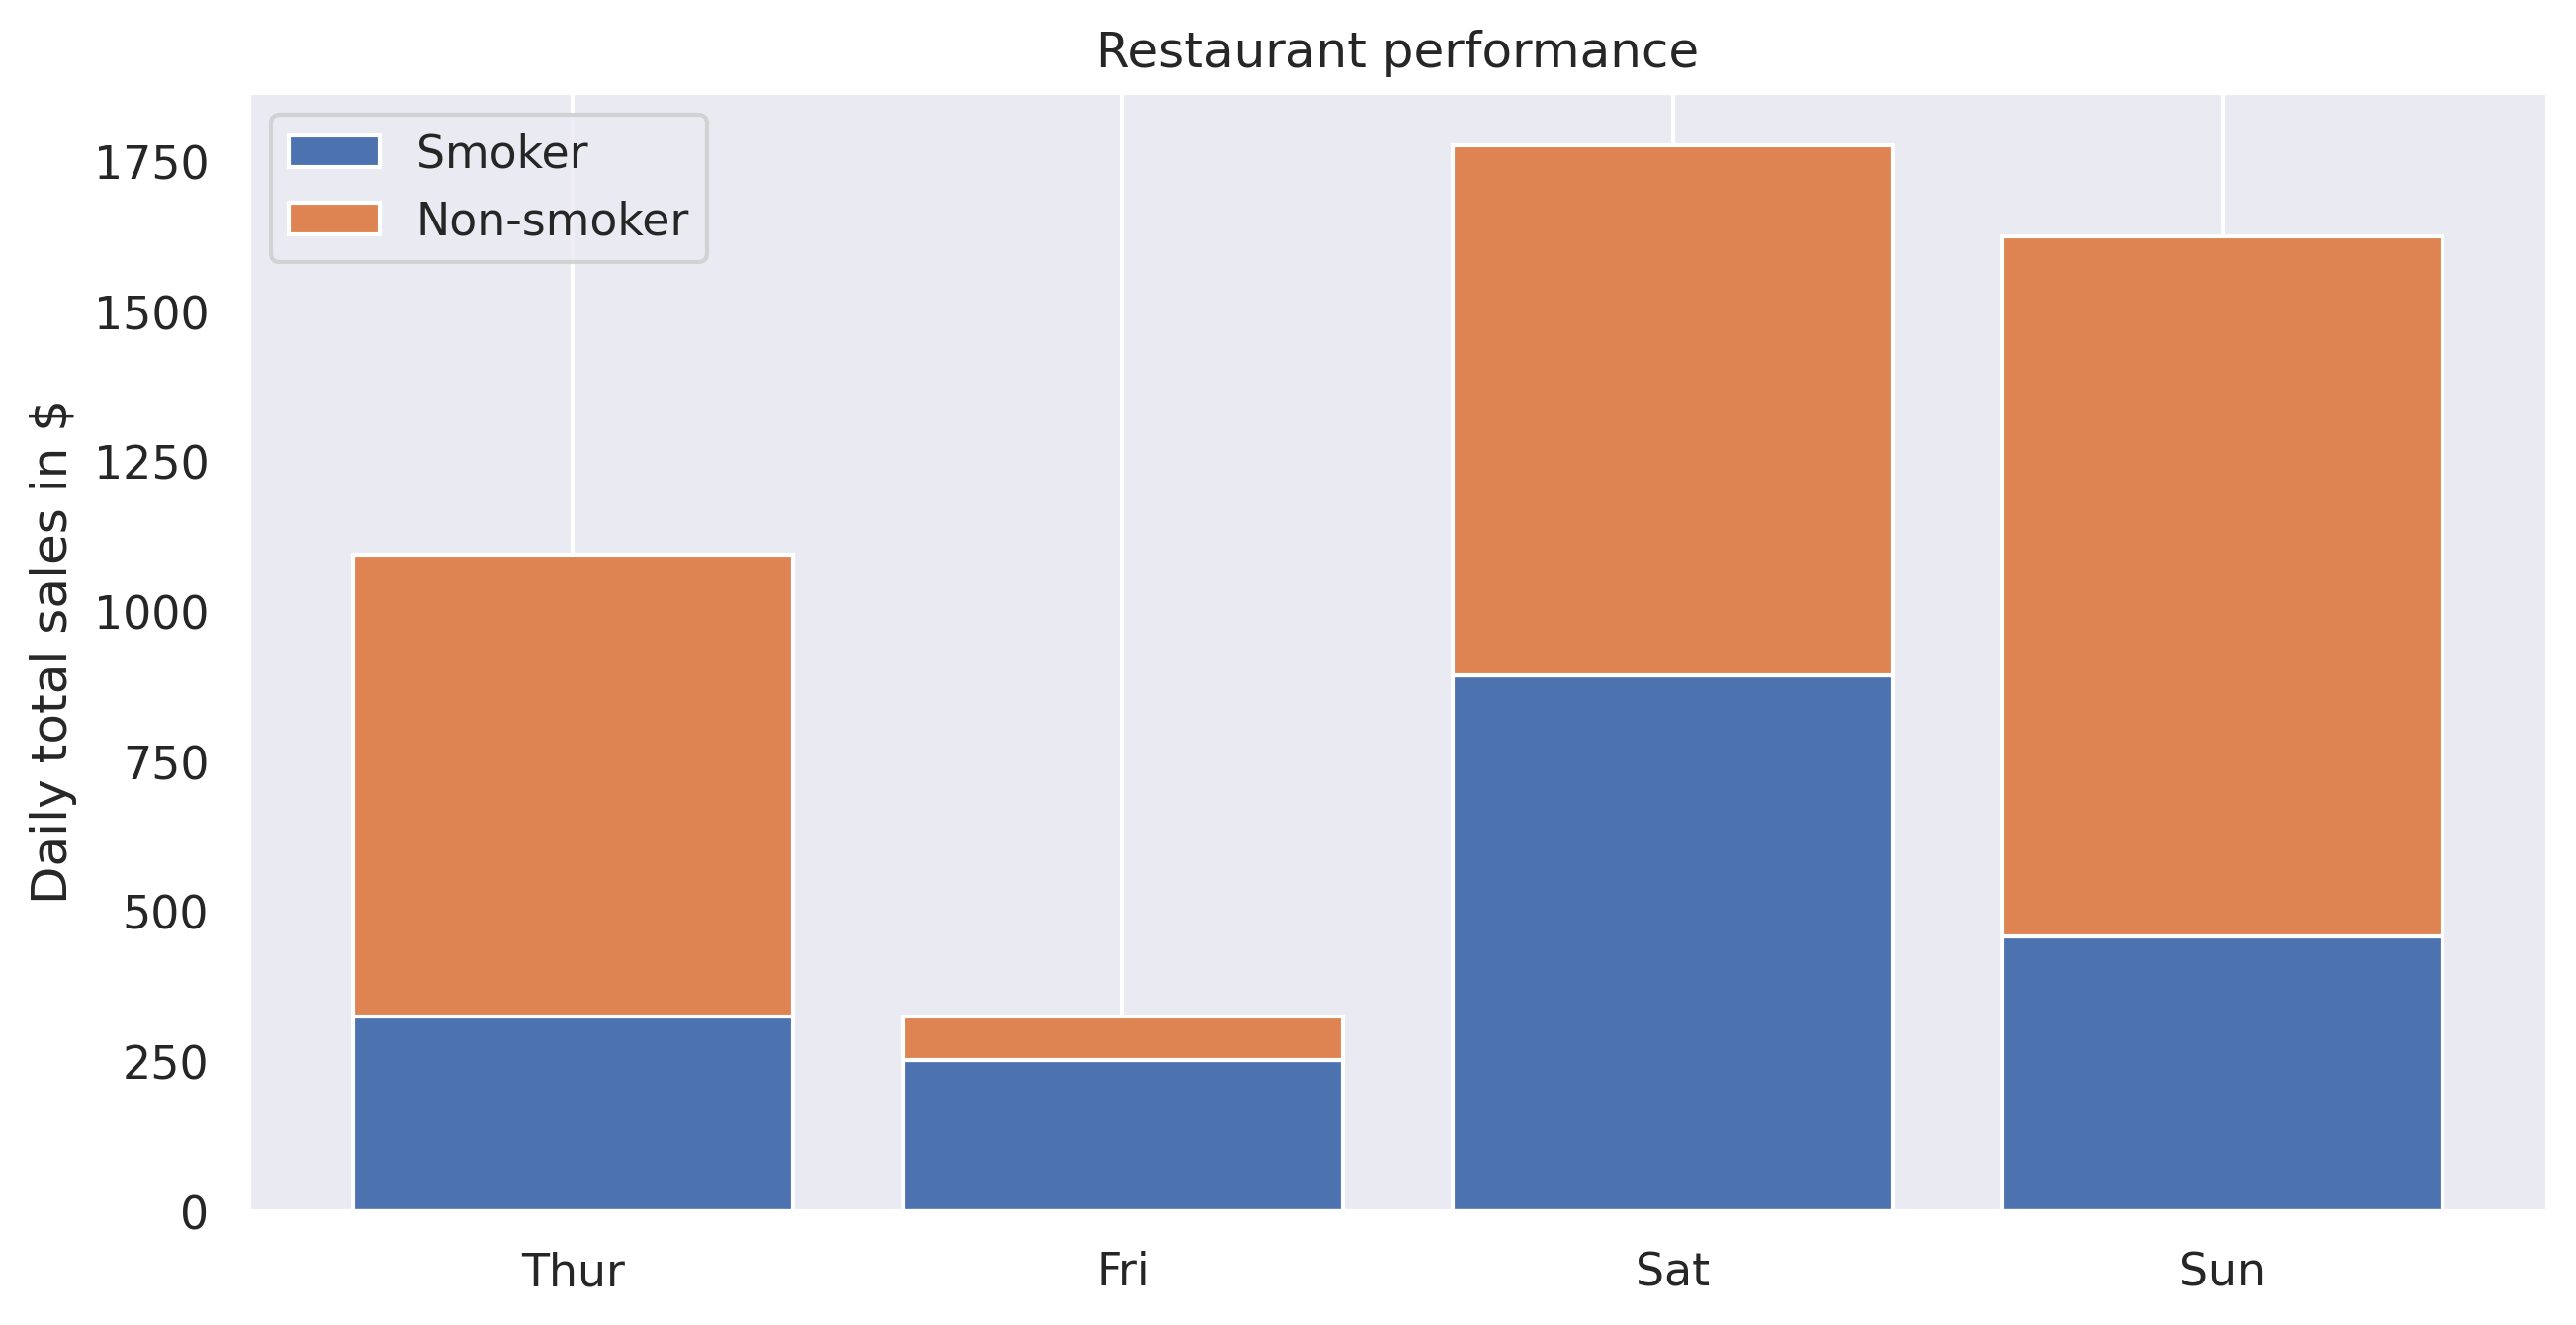

In [45]:
# Create figure
plt.figure(figsize=(10, 5), dpi=300)
# Create stacked bar plot
plt.bar(days_range, totals[:, 0], label='Smoker')
plt.bar(days_range, totals[:, 1], bottom=totals[:, 0], label='Non-smoker')
# Add legend
plt.legend()
# Add labels and title
plt.xticks(days_range)
ax = plt.gca()
ax.set_xticklabels(days)
ax.yaxis.grid()
plt.ylabel('Daily total sales in $')
plt.title('Restaurant performance')
# Show plot
plt.show()

## Histograma

Un histograma visualiza la distribución de una única variable numérica. Cada barra representa la frecuencia para un cierto intervalo. Los histogramas ayudan a obtener una estimación de las medidas estadísticas. Puede ver dónde se concentran los valores y puede detectar fácilmente los valores atípicos. Puede trazar un histograma con valores de frecuencia absolutos o, alternativamente, normalizar su histograma. Si desea comparar distribuciones de múltiples variables, puede usar diferentes colores para las barras.

**USO**
* Obtenga información sobre la distribución subyacente de un conjunto de datos.

**EJEMPLO**

Visualizaremos el cociente de inteligencia (CI) usando un histograma. 100 personas han venido para una entrevista en una empresa. Para ubicar a un solicitante individual en el grupo general, se utilizará un histograma.

In [33]:
# IQ samples
iq_scores = [126,  89,  90, 101, 102,  74,  93, 101,  66, 120, 108,  97,  98,
            105, 119,  92, 113,  81, 104, 108,  83, 102, 105, 111, 102, 107,
            103,  89,  89, 110,  71, 110, 120,  85, 111,  83, 122, 120, 102,
            84, 118, 100, 100, 114,  81, 109,  69,  97,  95, 106, 116, 109,
            114,  98,  90,  92,  98,  91,  81,  85,  86, 102,  93, 112,  76,
            89, 110,  75, 100,  90,  96,  94, 107, 108,  95,  96,  96, 114,
            93,  95, 117, 141, 115,  95,  86, 100, 121, 103,  66,  99,  96,
            111, 110, 105, 110,  91, 112, 102, 112,  75]

Trace un histograma con diez intervalos (bins) para las puntuaciones CI dadas. 
* Las puntuaciones de CI se distribuyen normalmente con una media de 100 y una desviación estándar de 15. 

Visualice la media como una línea roja continua vertical y la desviación estándar usando líneas verticales discontinuas. Añade etiquetas y un título.

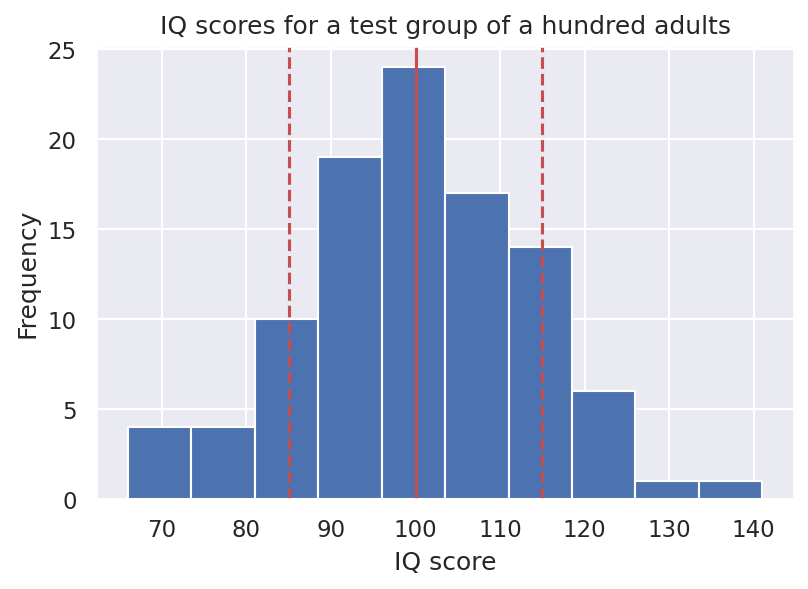

In [36]:
# Create figure
plt.figure(figsize=(6, 4),dpi=150)
# Create histogram
plt.hist(iq_scores, bins=10)
plt.axvline(x=100, color='r')
plt.axvline(x=115, color='r', linestyle= '--')
plt.axvline(x=85, color='r', linestyle= '--')
# Add labels and title
plt.xlabel('IQ score')
plt.ylabel('Frequency')
plt.title('IQ scores for a test group of a hundred adults')
# Show plot
plt.show()

In [40]:
iq_array = np.asarray(iq_scores)
iq_array.mean()
iq_array.std()

13.934457291190066

## Gráfico de línea

Los gráficos de líneas se utilizan para mostrar valores cuantitativos durante un período de tiempo continuo y mostrar información como una serie. Un gráfico de líneas es ideal para una **serie de tiempo** que está conectada por segmentos de línea recta.

El valor que se mide se coloca en el eje y, mientras que el eje x es la escala de tiempo.

**USO**
* Los gráficos de líneas son excelentes para comparar múltiples variables y visualizar tendencias tanto para una como para múltiples variables, especialmente si su conjunto de datos tiene muchos períodos de tiempo (más de 10).
* Para períodos de tiempo más pequeños, los gráficos de barras verticales pueden ser la mejor opción. 

**EJEMPLO**

Crearemos un gráfico de líneas para mostrar las tendencias de las acciones. Veamos el siguiente escenario: 
* Estas interesado en invertir en acciones. Descargaste los precios de las acciones de los "cinco grandes": Amazon, Google, Apple, Facebook y Microsoft. 

In [41]:
google = pd.read_csv('datasets/GOOGL_data.csv')
facebook = pd.read_csv('datasets/FB_data.csv')
apple = pd.read_csv('datasets/AAPL_data.csv')
amazon = pd.read_csv('datasets/AMZN_data.csv')
microsoft = pd.read_csv('datasets/MSFT_data.csv')
google.head()

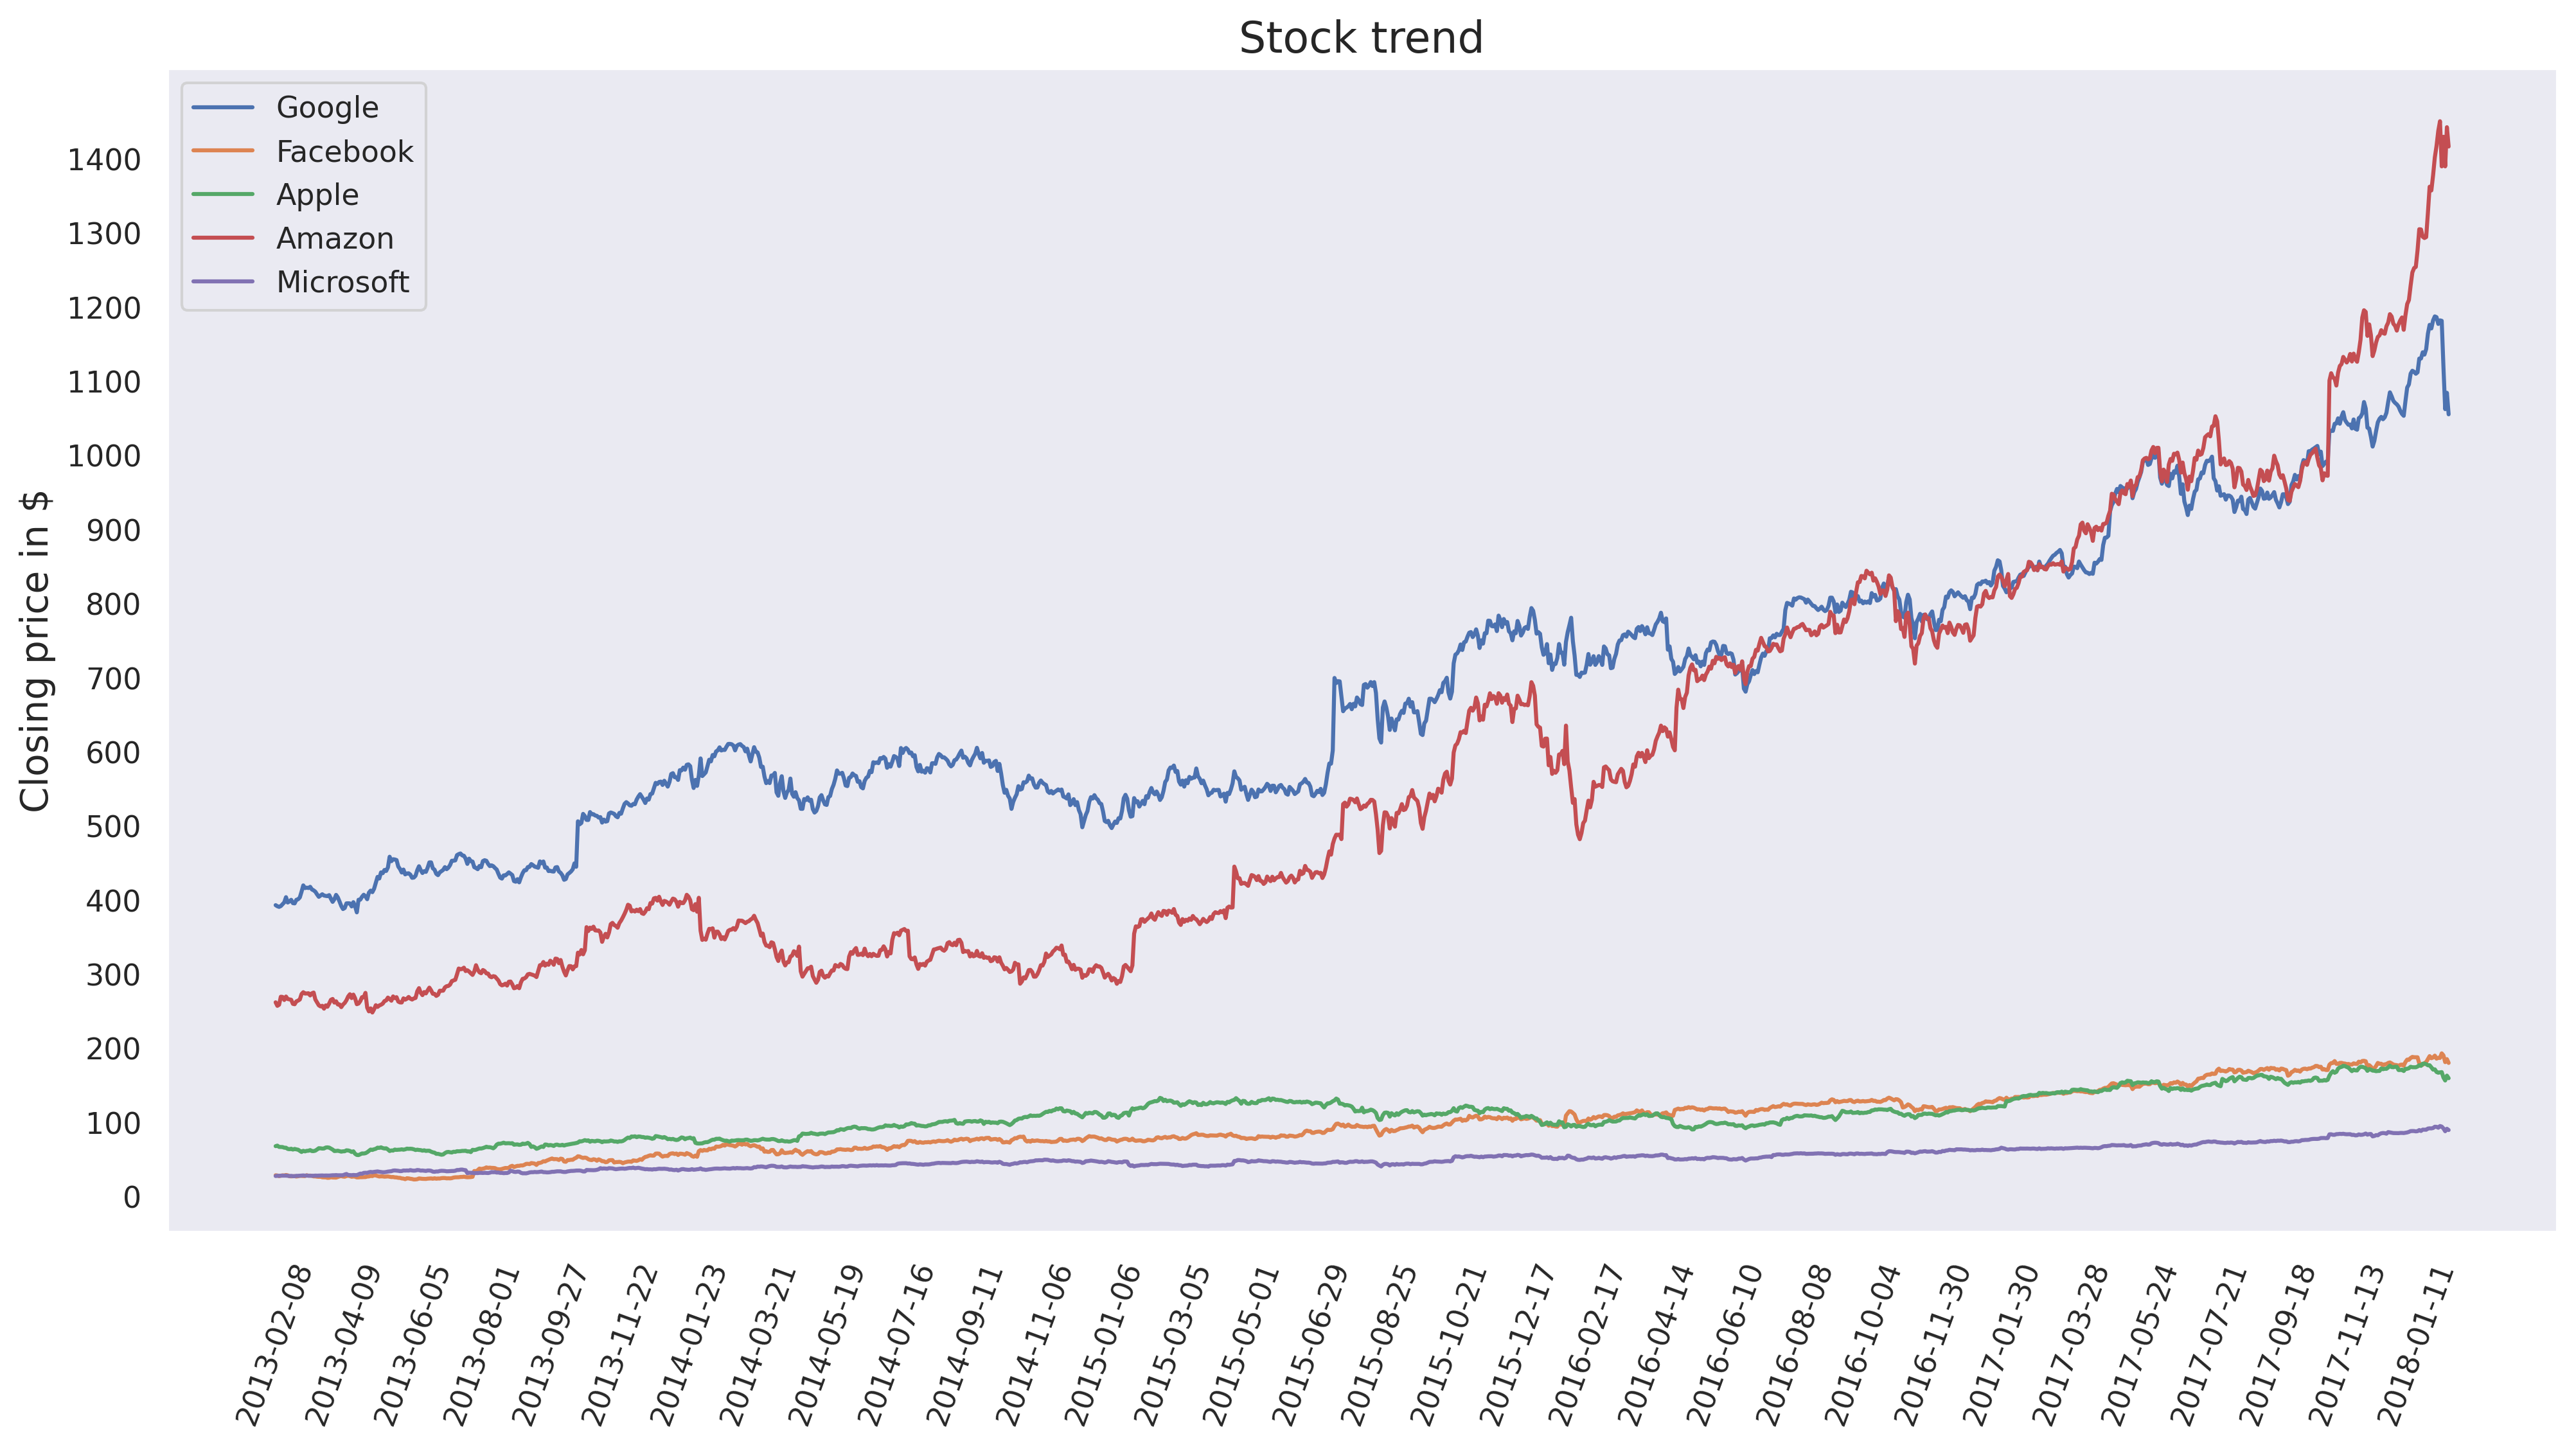

In [42]:
# Create figure
plt.figure(figsize=(16, 8), dpi=300)
# Plot data
plt.plot('date', 'close', data=google, label='Google')
plt.plot('date', 'close', data=facebook, label='Facebook')
plt.plot('date', 'close', data=apple, label='Apple')
plt.plot('date', 'close', data=amazon, label='Amazon')
plt.plot('date', 'close', data=microsoft, label='Microsoft')
# Specify ticks for x- and y-axis
plt.xticks(np.arange(0, 1260, 40), rotation=70)
plt.yticks(np.arange(0, 1450, 100))
# Add title and label for y-axis
plt.title('Stock trend', fontsize=16)
plt.ylabel('Closing price in $', fontsize=14)
# Add grid
plt.grid()
# Add legend
plt.legend()
# Show plot
plt.show()

## Correlación

Las medidas que hemos discutido hasta ahora solo consideraban variables individuales. Por el contrario, la correlación describe la relación estadística entre dos variables:
* En una correlación positiva, ambas variables se mueven en la misma dirección.
* En una correlación negativa, las variables se mueven en direcciones opuestas.
* En correlación cero, las variables no están relacionadas. 

**NOTA**
Una cosa que debe tener en cuenta es que la correlación **no implica
causalidad**. La correlación **describe la relación** entre dos o más variables, mientras que la causalidad describe cómo un evento es causado por otro.

Por ejemplo, considere un escenario en el que las ventas de helados se correlacionan con el número de muertes por ahogamiento. Pero eso no significa que el consumo de helado provoque ahogamiento. Podría haber una tercera variable, digamos la temperatura, que puede ser responsable de esta correlación. Las temperaturas más altas pueden provocar un aumento tanto en las ventas de helados como en el número de personas que practican natación, lo que puede ser la razón real del aumento de las muertes por ahogamiento.

## Diagrama de dispersión
Los diagramas de dispersión muestran puntos de datos para dos variables numéricas, mostrando una variable en ambos ejes.

**USO**
* Puede detectar si existe una correlación (relación) entre dos variables.
* Le permiten trazar la relación entre múltiples grupos o categorías usando diferentes colores.
* Un gráfico de burbujas, que es una variación del gráfico de dispersión, es una excelente herramienta para visualizar la correlación de una tercera variable.

**EJEMPLO**

Utilizaremos un diagrama de dispersión para mostrar la correlación dentro de un conjunto de datos. Veamos el siguiente escenario: 
* Se te proporciona un conjunto de datos que contiene información sobre varios animales. 
* Visualice la correlación entre los diversos atributos de los animales, como la longevidad máxima en años y la masa corporal en gramos.

In [53]:
data = pd.read_csv('datasets/anage_data.csv', index_col=0)
data.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,0.19,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,0.30,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN
2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,NaN,8.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,...,NaN,0.50,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN
4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,NaN,28.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN


Filtra los datos para que termines con muestras que contengan una masa corporal y una longevidad máxima. 

Ordenar los datos según la clase de animal; aquí puedes usar la función isfinite() (para verificar si el número es finito o no) verifica la finitud del elemento dado:

In [52]:
# Preprocessing
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]
data.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
11,18,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,americanus,American toad,910.0,...,NaN,36.0,captivity,medium,acceptable,NaN,NaN,0.00829,21.60,288.0
19,26,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,terrestris,Southern toad,NaN,...,NaN,10.0,captivity,medium,acceptable,NaN,NaN,0.00698,19.20,288.0
29,36,Animalia,Chordata,Amphibia,Anura,Bufonidae,Rhinella,marina,Cane toad,365.0,...,NaN,24.8,captivity,large,acceptable,NaN,NaN,0.03030,105.00,293.0
53,60,Animalia,Chordata,Amphibia,Anura,Hylidae,Hyla,versicolor,Gray treefrog,730.0,...,NaN,7.8,captivity,medium,acceptable,NaN,NaN,0.00433,6.97,290.5
78,85,Animalia,Chordata,Amphibia,Anura,Pipidae,Xenopus,laevis,African clawed frog,183.0,...,NaN,30.3,captivity,large,acceptable,NaN,NaN,0.01200,63.60,288.0


In [54]:
# Sort according to class
amphibia = data[data['Class'] == 'Amphibia']
aves = data[data['Class'] == 'Aves']
mammalia = data[data['Class'] == 'Mammalia']
reptilia = data[data['Class'] == 'Reptilia']

Crea un diagrama de dispersión que visualice la correlación entre la masa corporal y la longevidad máxima. Use diferentes colores para agrupar muestras de datos según su clase. Agregue una leyenda, etiquetas y un título. Utilice una escala logarítmica tanto para el eje x como para el eje y:

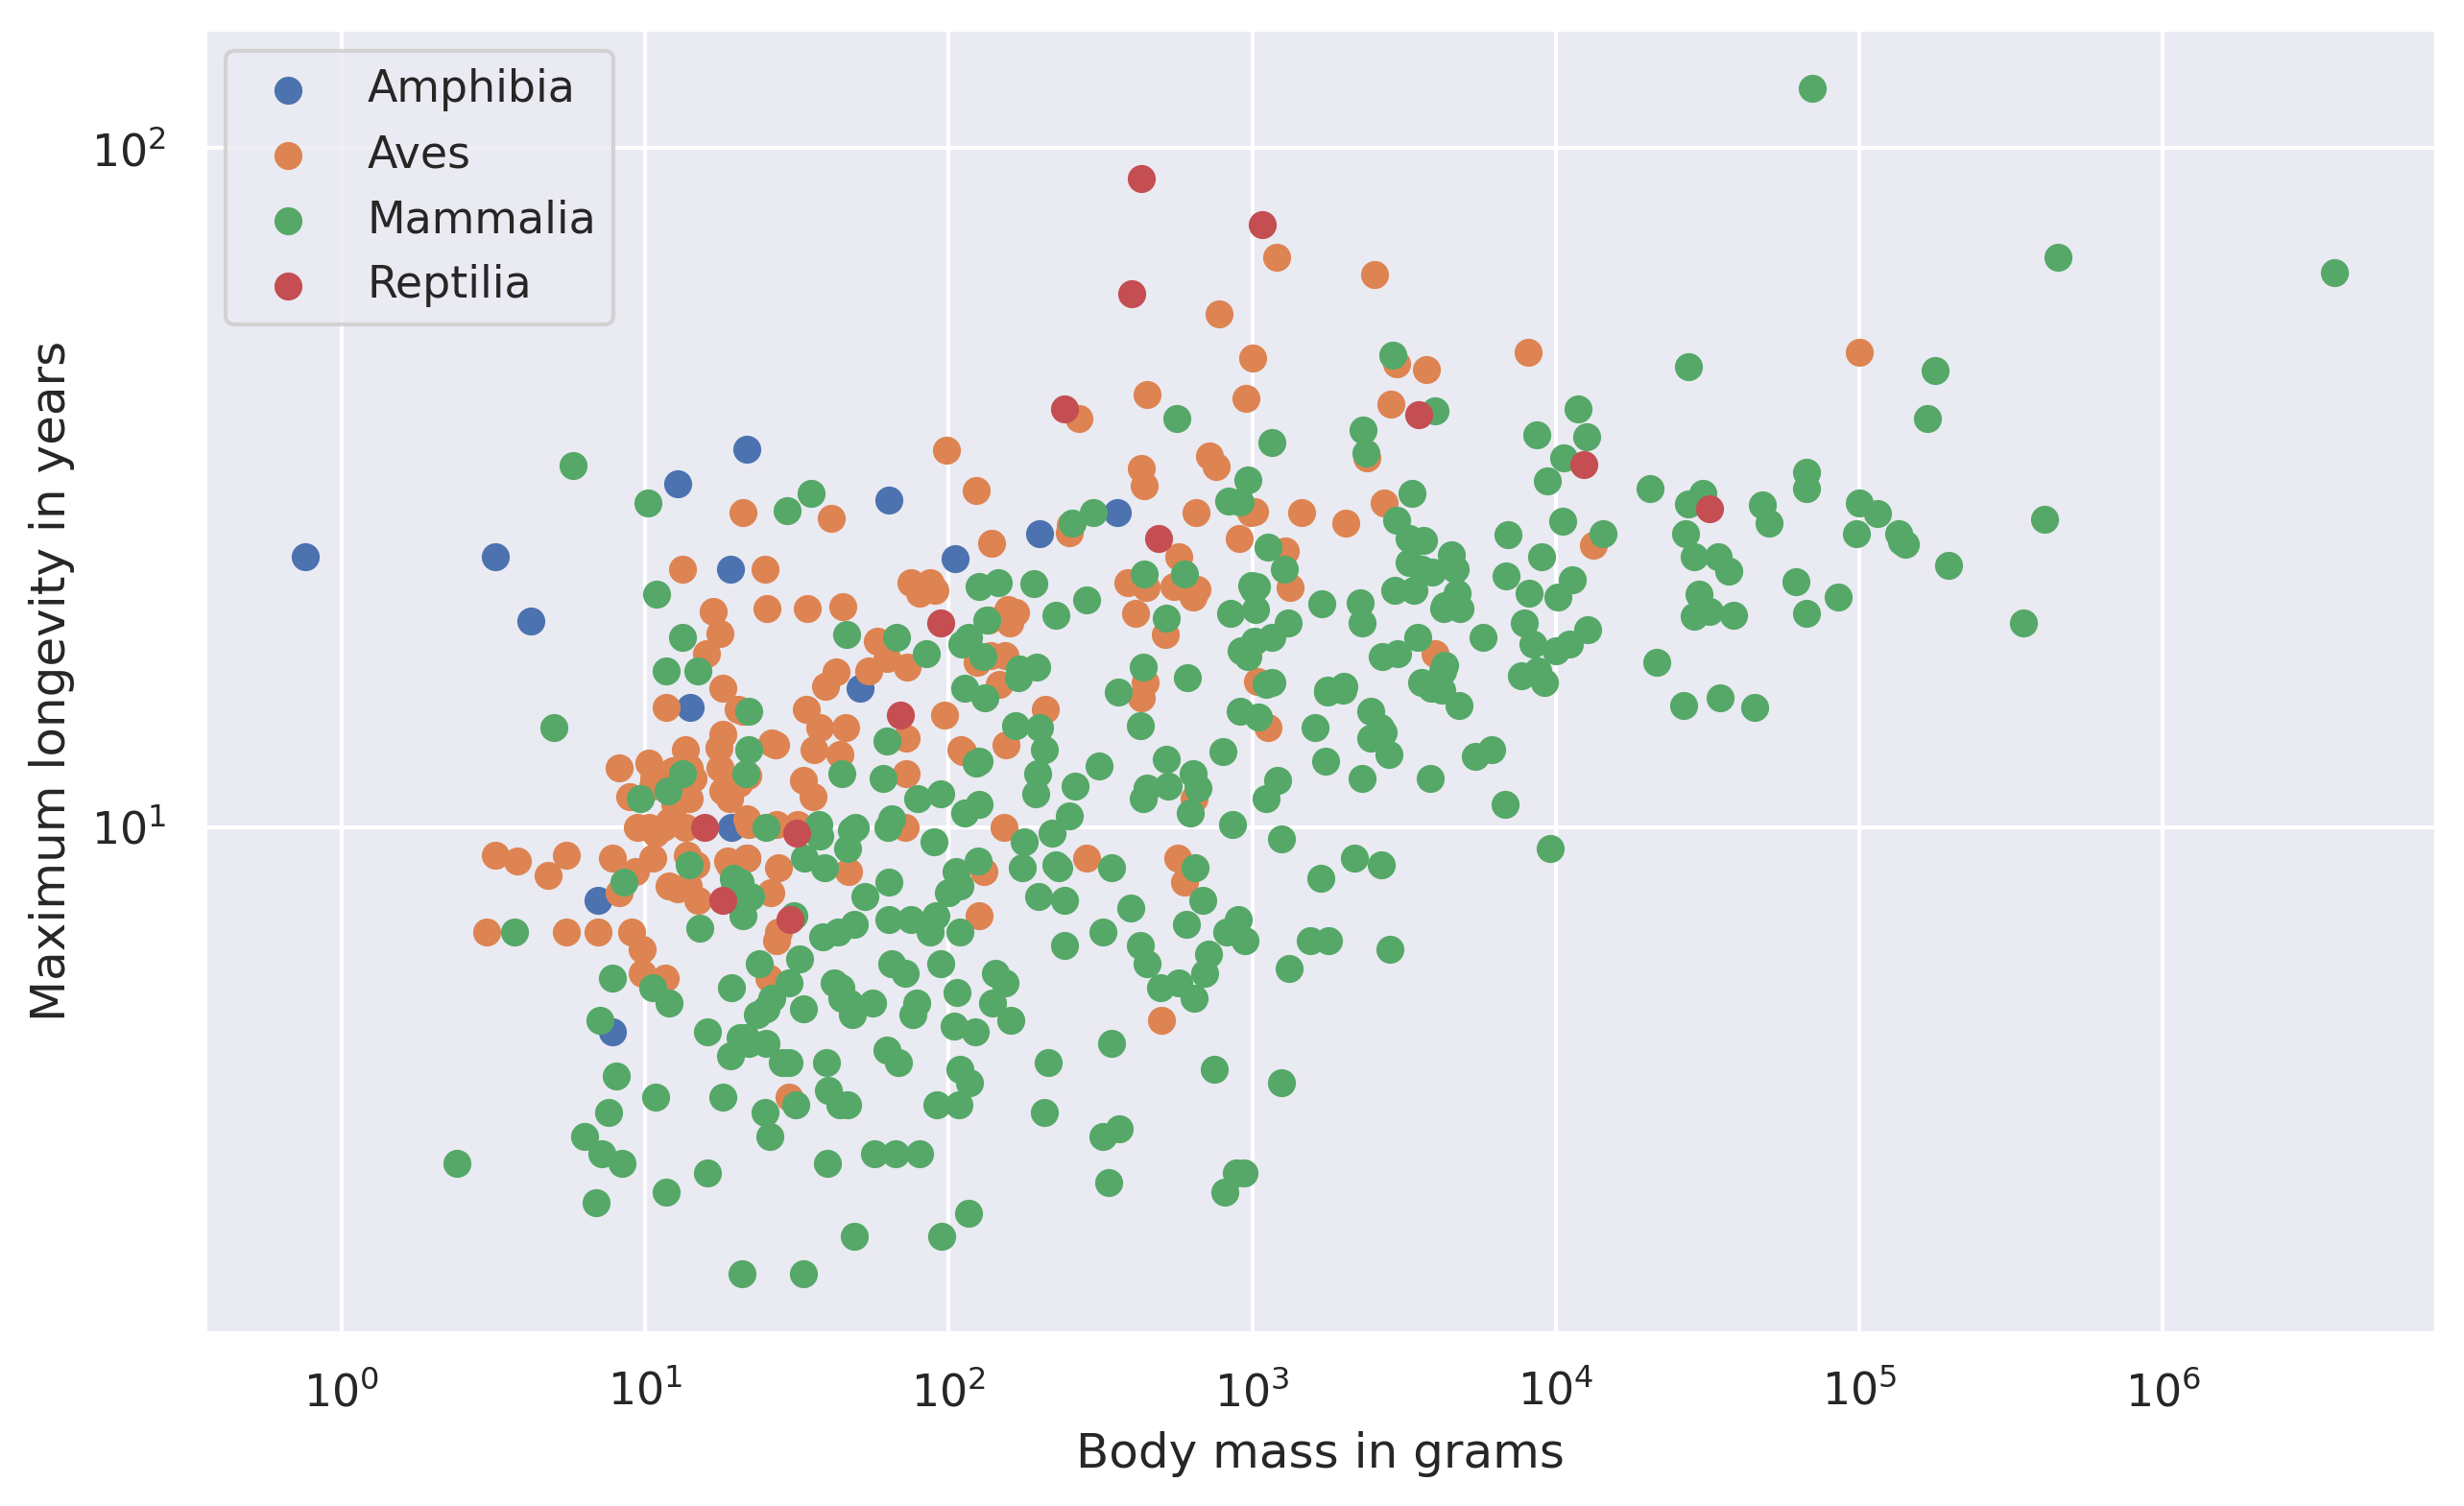

In [56]:
# Create figure
plt.figure(figsize=(10, 6), dpi=300)
# Create scatter plot
plt.scatter(amphibia[mass], amphibia[longevity], \
label='Amphibia')
plt.scatter(aves[mass], aves[longevity], \
label='Aves')
plt.scatter(mammalia[mass], mammalia[longevity], \
label='Mammalia')
plt.scatter(reptilia[mass], reptilia[longevity], \
label='Reptilia')
# Add legend
plt.legend()
# Log scale
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
# Add labels
plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
# Show plot
plt.show()

## Diagrama de caja
El diagrama de caja muestra múltiples mediciones estadísticas. 
* El cuadro se extiende desde los valores del cuartil inferior al superior de los datos, lo que nos permite visualizar el rango intercuartílico (RIC). 
* La línea horizontal dentro de la caja denota la mediana.
* Las líneas paralelas que se extienden desde las cajas se llaman bigotes; indican la variabilidad fuera de los cuartiles inferior y superior. 
* También hay una opción para mostrar datos atípicos, generalmente como círculos o diamantes, más allá del final de los bigotes.

**USO**
* Compare medidas estadísticas para múltiples variables o grupos.

**EJEMPLO**

Visualizaremos el cociente de inteligencia (CI) usando un histograma. 100 personas han venido para una entrevista en una empresa. Para ubicar a un solicitante individual en el grupo general, se utilizará un histograma.

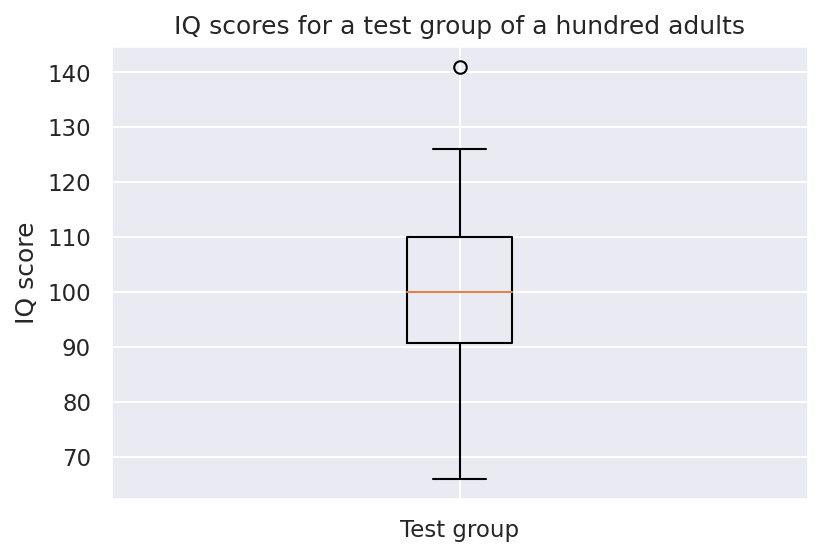

In [57]:
# Create figure
plt.figure(figsize=(6, 4), dpi=150)
# Create histogram
plt.boxplot(iq_scores)
# Add labels and title
ax = plt.gca()
ax.set_xticklabels(['Test group'])
plt.ylabel('IQ score')
plt.title('IQ scores for a test group of a hundred adults')
# Show plot
plt.show()

In [58]:
group_a = [118, 103, 125, 107, 111,  96, 104,  97,  96, 114,  96,  75, 114,
       107,  87, 117, 117, 114, 117, 112, 107, 133,  94,  91, 118, 110,
       117,  86, 143,  83, 106,  86,  98, 126, 109,  91, 112, 120, 108,
       111, 107,  98,  89, 113, 117,  81, 113, 112,  84, 115,  96,  93,
       128, 115, 138, 121,  87, 112, 110,  79, 100,  84, 115,  93, 108,
       130, 107, 106, 106, 101, 117,  93,  94, 103, 112,  98, 103,  70,
       139,  94, 110, 105, 122,  94,  94, 105, 129, 110, 112,  97, 109,
       121, 106, 118, 131,  88, 122, 125,  93,  78]
group_b = [126,  89,  90, 101, 102,  74,  93, 101,  66, 120, 108,  97,  98,
            105, 119,  92, 113,  81, 104, 108,  83, 102, 105, 111, 102, 107,
            103,  89,  89, 110,  71, 110, 120,  85, 111,  83, 122, 120, 102,
            84, 118, 100, 100, 114,  81, 109,  69,  97,  95, 106, 116, 109,
            114,  98,  90,  92,  98,  91,  81,  85,  86, 102,  93, 112,  76,
            89, 110,  75, 100,  90,  96,  94, 107, 108,  95,  96,  96, 114,
            93,  95, 117, 141, 115,  95,  86, 100, 121, 103,  66,  99,  96,
            111, 110, 105, 110,  91, 112, 102, 112,  75]
group_c = [108,  89, 114, 116, 126, 104, 113,  96,  69, 121, 109, 102, 107,
       122, 104, 107, 108, 137, 107, 116,  98, 132, 108, 114,  82,  93,
        89,  90,  86,  91,  99,  98,  83,  93, 114,  96,  95, 113, 103,
        81, 107,  85, 116,  85, 107, 125, 126, 123, 122, 124, 115, 114,
        93,  93, 114, 107, 107,  84, 131,  91, 108, 127, 112, 106, 115,
        82,  90, 117, 108, 115, 113, 108, 104, 103,  90, 110, 114,  92,
       101,  72, 109,  94, 122,  90, 102,  86, 119, 103, 110,  96,  90,
       110,  96,  69,  85, 102,  69,  96, 101,  90]
group_d = [ 93,  99,  91, 110,  80, 113, 111, 115,  98,  74,  96,  80,  83,
       102,  60,  91,  82,  90,  97, 101,  89,  89, 117,  91, 104, 104,
       102, 128, 106, 111,  79,  92,  97, 101, 106, 110,  93,  93, 106,
       108,  85,  83, 108,  94,  79,  87, 113, 112, 111, 111,  79, 116,
       104,  84, 116, 111, 103, 103, 112,  68,  54,  80,  86, 119,  81,
        84,  91,  96, 116, 125,  99,  58, 102,  77,  98, 100,  90, 106,
       109, 114, 102, 102, 112, 103,  98,  96,  85,  97, 110, 131,  92,
        79, 115, 122,  95, 105,  74,  85,  85,  95]

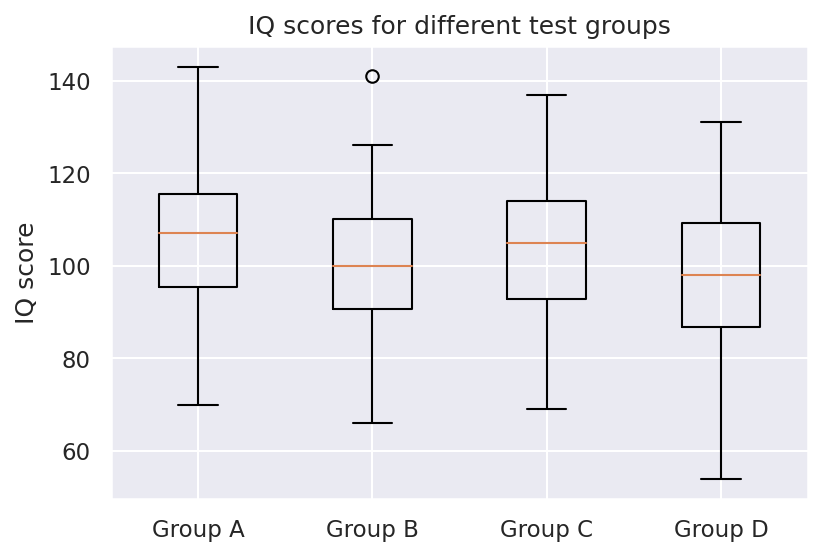

In [59]:
# Create figure
plt.figure(figsize=(6, 4), dpi=150)
# Create histogram
plt.boxplot([group_a, group_b, group_c, group_d])
# Add labels and title
ax = plt.gca()
ax.set_xticklabels(['Group A', 'Group B', 'Group C', 'Group D'])
plt.ylabel('IQ score')
plt.title('IQ scores for different test groups')
# Show plot
plt.show()

## Gráfico de radar
Los gráficos de radar (también conocidos como gráficos de araña o web) visualizan múltiples variables con cada variable trazada en su propio eje, lo que da como resultado un polígono. Todos los ejes están dispuestos radialmente, partiendo del centro con distancias iguales entre sí, y tienen la misma escala.

**USO**

* Los gráficos de radar son excelentes para comparar múltiples variables cuantitativas para un solo grupo o varios grupos.
* También son útiles para mostrar qué variables obtienen una puntuación alta o baja dentro de un conjunto de datos, lo que las hace ideales para visualizar el rendimiento.

Un gráfico de radar es básicamente un gráfico de líneas con una proyección polar. Hay dos cosas importantes que tenemos que hacer. Primero, tenemos que repetir los primeros valores al final para cerrar la línea. En segundo lugar, tenemos que crear una subparcela con proyección polar.

In [60]:
# Sample data
# Attributes: Efficiency, Quality, Commitment, Responsible Conduct, Cooperation
data = pd.DataFrame({
    'Employee': ['Alex', 'Alice', 'Chris', 'Jennifer'],
    'Efficiency': [5, 4, 4, 3,],
    'Quality': [5, 5, 3, 3],
    'Commitment': [5, 4, 4, 4],
    'Responsible Conduct': [4, 4, 4, 3],
    'Cooperation': [4, 3, 4, 5]
})

Crea los valores de ángulo y cierre el gráfico.

In [91]:
attributes = list(data.columns[1:])
values = list(data.values[:, 1:])
employees = list(data.values[:, 0])

angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
# Close the plot
angles += angles[:1]
values = np.asarray(values)
values = np.concatenate([values, values[:, 0:1]], axis=1)

In [87]:
attributes

['Employee',
 'Efficiency',
 'Quality',
 'Commitment',
 'Responsible Conduct',
 'Cooperation']

Crea subgrafos con la proyección polar. Establezca un diseño adecuado para que nada se superponga.

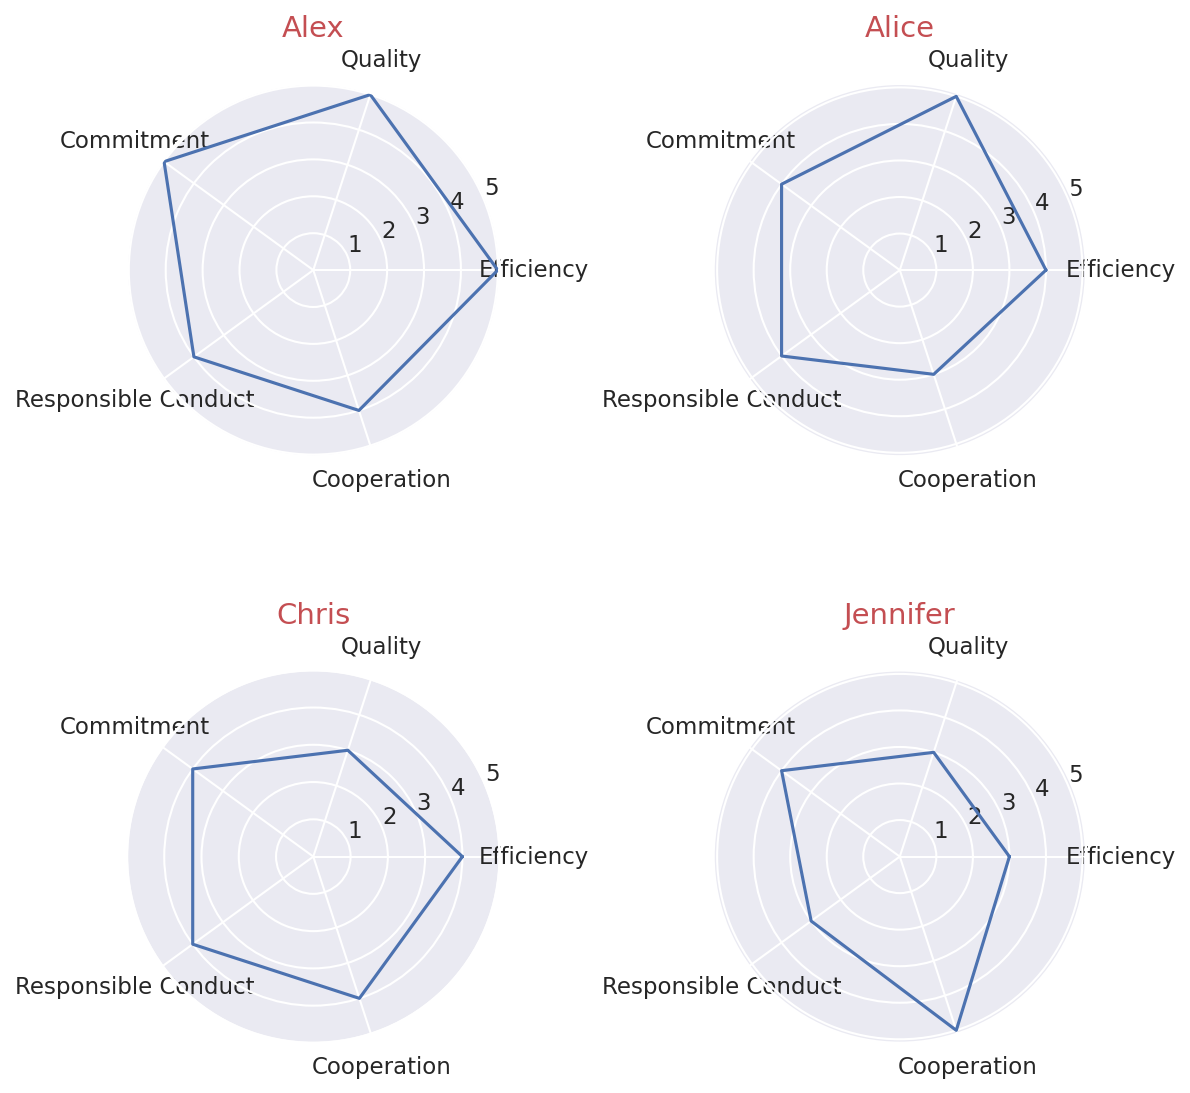

In [93]:
# Create figure
plt.figure(figsize=(8, 8), dpi=150)
# Create subplots
for i in range(4):
    ax = plt.subplot(2, 2, i + 1, polar=True)
    ax.plot(angles, values[i])
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_xticks(angles[:5])
    ax.set_xticklabels(attributes)
    ax.set_title(employees[i], fontsize=14, color='r')
# Set tight layout
plt.tight_layout()
# Show plot
plt.show()